# Visualizing Earnings Based On College Majors from 2010 and 2012

you can find the dataset here: https://github.com/fivethirtyeight/data/tree/master/college-majors


STEP 1:
before the analysis of the dataset, we should import the libraries we need and remove rows containing null values:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
# jupyter magic command: plots are displayed inline.
% matplotlib inline 

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0]) # return the first row formatted as a table.
print('\n')
print(recent_grads.head()) # to become familiar with how the data is structured.
print('\n')
print(recent_grads.tail())
print('\n')
print(recent_grads.describe()) # generate summary statistics for all of the numeric columns.

raw_data_count = recent_grads.shape[0] # check number of rows
print(raw_data_count)
print('\n')

recent_grads = recent_grads.dropna() # drop rows with missing values

cleaned_data_count = recent_grads.shape[0] # check number of rows after cleaning
print(cleaned_data_count)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


   Rank  

obs: only one row contained missing values and was dropped.

STEP 2: Bild plots to explore the following questions:

a) Do students in more popular majors make more money?

b) Do students that majored in subjects that were majority female make more money?

c) Is there any link between the number of full-time employees and median salary?


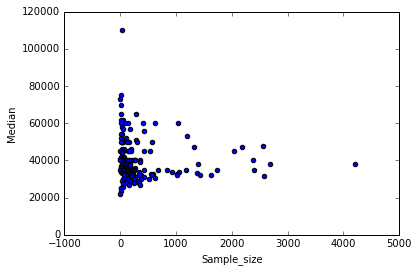

In [6]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

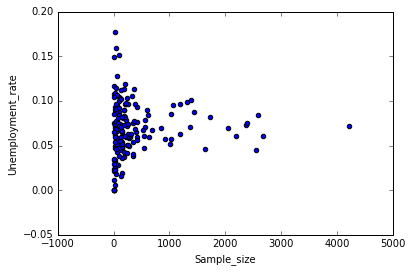

In [7]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

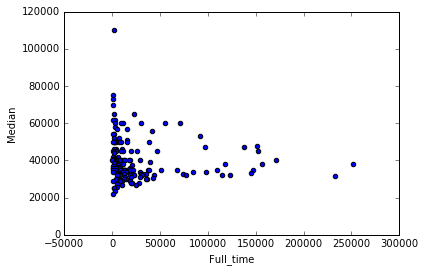

In [8]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')

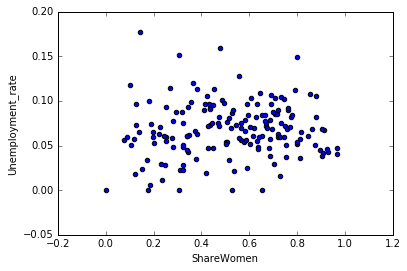

In [9]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

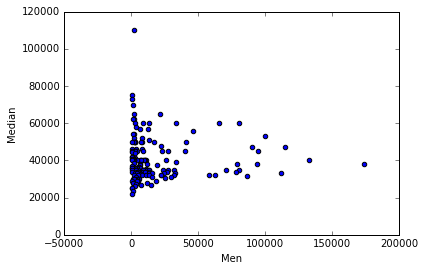

In [10]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter')

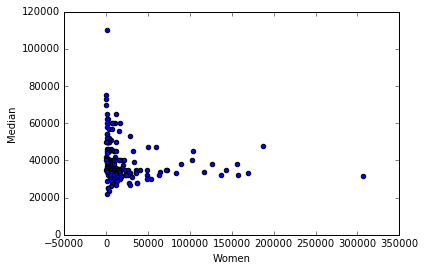

In [11]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter')

**ANSWERS:**

a) With the first plot, by crossing data from Sample_size with Median, we can infer that the less popular majors can have higher Median salaries. 

b) With the last three plots we can see that majors with a low proportion of women have an income range from around 30k up to 70k. The income range gradually drops between less than 60k and 20k when women share increases to more than 60 per cent. The graph shows that graduated students in subjects with a higher number of women should expect lower salaries than man-dominant majors. This may indicate that women are underpaid.

c) The third plot shows that the number of full-time employed for most major subjects are less than 50000 with a wide range of median earning from 20k and 80k. However, this range of median salary gets narrowed by the increases in the number of full-time employed. The median salary for majors with more than 100000 varies between 30k and 50k.

STEP 3: explore the distribution of values in the columns using histogram plots:

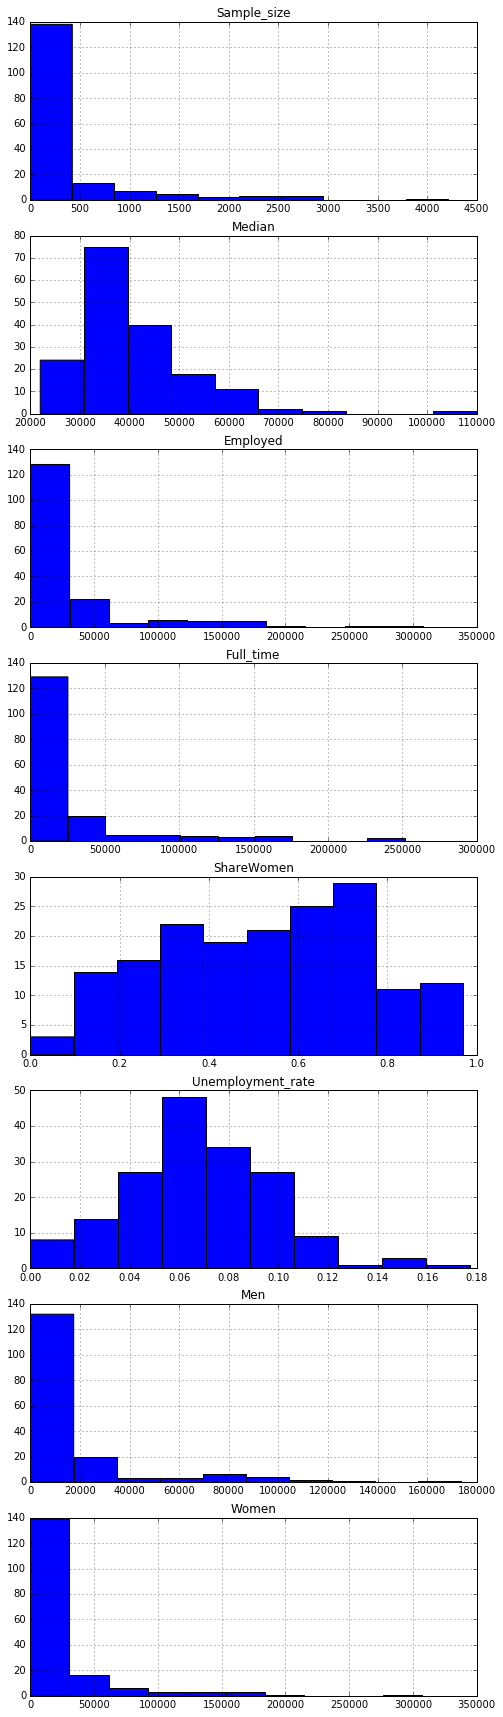

In [26]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize = (8, 30))
for n in range(8):
    ax = fig.add_subplot(8,1,n+1)
    ax = recent_grads[cols[n]].hist()
    plt.title(cols[n])
    

**OBSERVATIONS ON HISTOGRAMS:**

- The Total, Sample_size, Employed, Full_time, Men and Women all are right-skewed data distribution which means that more data presence over the right of the pick of histogram graph. This distribution is expected based on the distribution of total graduated students among major courses over two years.
- The SharedWomen and unemployment_rate show different distribution as their values are not the number of cases but the proportion.
- Unemployment rate has an approximately normal distribution with the highest frequency at around 6 percent.
- The distribution of SharedWomen does not show a specific pattern.
- Graduated students from most major courses have a Median salary between 30k and 50k with the highest frequency at around 30 to 35k.

STEP 4: create scatter matrix plot to accurate the analysis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f907a1f5908>,
      dtype=object)

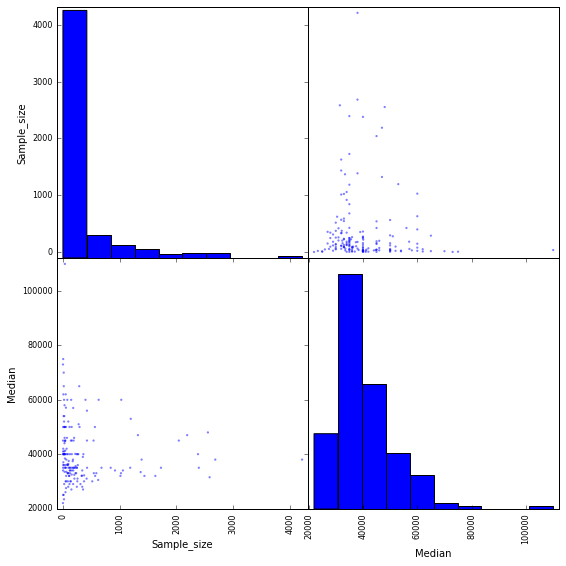

In [29]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(9,9))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90782bb208>,
      dtype=object)

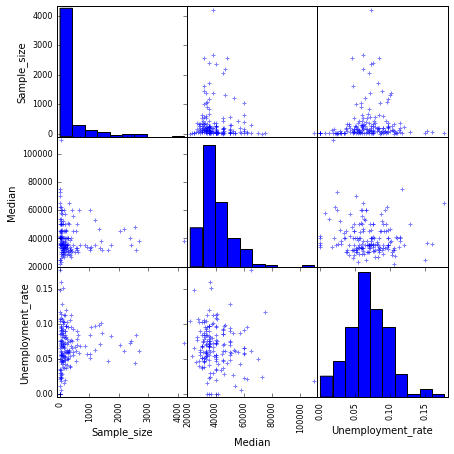

In [31]:
scatter_matrix(recent_grads[['Sample_size', 'Median', "Unemployment_rate"]], figsize=(7,7), marker = '+')

STEP 5: create bar plots to accurate the analysis: 

- compare the percentages of women (ShareWomen) from the first ten rows and last ten rows of the recent_grads dataframe.

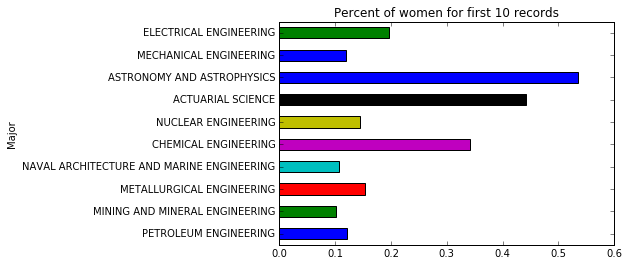

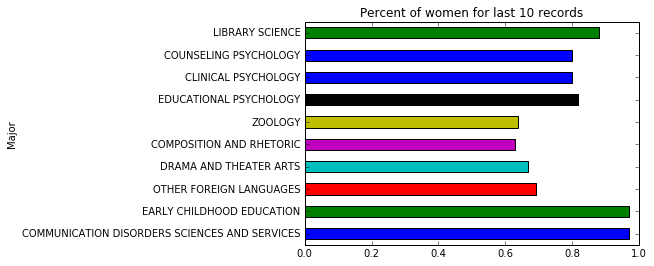

In [44]:
recent_grads[:10].plot.barh(x='Major', y='ShareWomen', legend=False, title='Percent of women for first 10 records')
recent_grads.tail(10).plot.barh(x='Major', y='ShareWomen', legend=False, title='Percent of women for last 10 records')

- Use bar plots to compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.

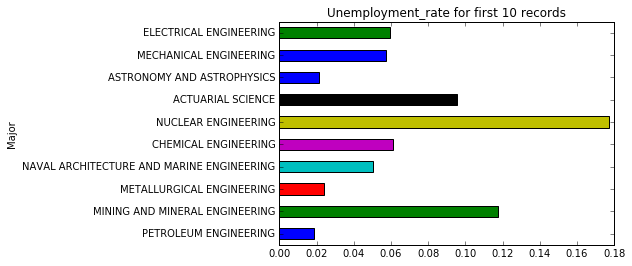

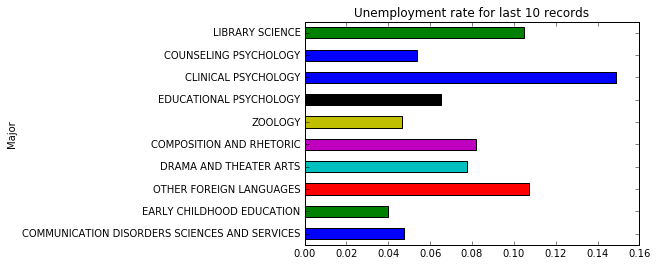

In [43]:
ax1 = recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment_rate for first 10 records')
ax2 = recent_grads.tail(10).plot.barh(x='Major', y='Unemployment_rate', legend=False, title='Unemployment rate for last 10 records')


**OBSERVATIONS:**
I collected the first and last ten records from the ranked data. As the data is ranked by median income, the first and last groups have the highest and lowest median salary respectively.

- Percentage of women:

    - The females' percentage is lower in the first ten major subjects (10-55%) than the last ten (60-95%).
    - Astronomy and Astrophysics, Actuarial Science, and Chemical Engineering are subjects with the highest percentage of females among the first ten subjects.
    - Communication Disorders Sciences and Service, Early Childhood Education, and Library Science have the highest rate of females who graduated in the last ten collected topics with low median salary.

- Unemployment rate:

    - The Unemployment rates are approximately similar in two groups with slightly lower in the first ten major subjects.
    - Astronomy and Astrophysics, Metallurgical engineering, and Petroleum Engineering are major topics with the lowest unemployment rate (less than 3%) among the first ten collected group.
    - Nuclear Engineering (18%) and Clinical Psychology(15%) are subjects with the highest unemployment rate among the first and last ten subjects.